# Boston vs. Seattle Airbnb III 

**In this notebook(Part 3), I will be answering the question: Is it possible to predict the price with 5 features? If yes, compare the 2 cities.**

In [1]:
import warnings
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## Question 2: Is it possible to predict the price with 8 features? If yes, compare the 2 cities.

### Step 1: Examining and Cleaning Data

In [2]:
# import both datasets
seattle_listings = pd.read_csv('seattle_airbnb/listings.csv')
boston_listings = pd.read_csv('boston_airbnb/listings.csv')

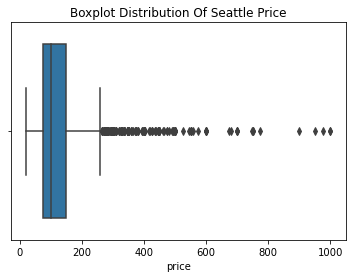

In [3]:
#cleaning up the price
seattle_listings['price'] = seattle_listings['price'].map(lambda x: int(x[1:-3].replace(',','')))
# similair to what we did with neighbourhood, this time we will examine the overall city
sb.boxplot(x = 'price', data = seattle_listings)
plt.title("Boxplot Distribution Of Seattle Price");

**As we can see, there are quite alot of outliers. I will need to address these outliers which is what I'm going to do next. I will be using help from the link down below.** <br>
> **Link: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba**

In [4]:
# addressing and dropping the outliers using (1.5*IQR + Q3)
Q1 = seattle_listings['price'].quantile(0.25)
Q3 = seattle_listings['price'].quantile(0.75)
IQR = Q3 - Q1
upper = 1.5*(IQR) + Q3

upper

262.5

In [5]:
seattle_listings = seattle_listings[seattle_listings['price'] <= upper]
seattle_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,85,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,150,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming 

**Now, it's time to determine the features that I am interested in. I will then divide them into independent variables X and dependent variable y.**

**Interested Variables/Features For Seattle Dataset:** <br>
> **`1.` host_response_rate <br> `2.` host_response_time <br> `3.` bedrooms <br> `4.` review_scores_rating <br> `5.` number_of_reviews <br> `6.` neighbourhood_group_cleansed <br> `7.` property_type <br> `8.` bathrooms** 

In [6]:
X = seattle_listings[['neighbourhood_group_cleansed', 'host_response_time', 'host_response_rate',
                      'bedrooms', 'bathrooms', 'property_type', 'number_of_reviews','review_scores_rating']]
y = seattle_listings['price']

In [7]:
# cleaning up the columns' names
X = X.rename(columns = lambda x: str(x.replace('_',' ').strip().title()))

**Splitting dataset**

In [8]:
# random_state help: https://scikit-learn.org/stable/glossary.html#term-random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state= 42)

### Step 2: Addressing And Handling Missing Data 

In [9]:
# Checking for nulls
X_train.isnull().any()

Neighbourhood Group Cleansed    False
Host Response Time               True
Host Response Rate               True
Bedrooms                         True
Bathrooms                        True
Property Type                    True
Number Of Reviews               False
Review Scores Rating             True
dtype: bool

In [10]:
# after examination, it doesn't seem like there is any need to drop any of the columns
X_train.isnull().sum()/X_train.shape[0]

Neighbourhood Group Cleansed    0.0000
Host Response Time              0.1272
Host Response Rate              0.1272
Bedrooms                        0.0020
Bathrooms                       0.0052
Property Type                   0.0004
Number Of Reviews               0.0000
Review Scores Rating            0.1688
dtype: float64

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 922 to 3389
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Group Cleansed  2500 non-null   object 
 1   Host Response Time            2182 non-null   object 
 2   Host Response Rate            2182 non-null   object 
 3   Bedrooms                      2495 non-null   float64
 4   Bathrooms                     2487 non-null   float64
 5   Property Type                 2499 non-null   object 
 6   Number Of Reviews             2500 non-null   int64  
 7   Review Scores Rating          2078 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 175.8+ KB


In [12]:
# Viewing the head to make imputation decisions
# For numeric variables, I will be replacing them with the mean
# For categorical variables, it makes more sense to replace them with the mode
X_train.head()

,Neighbourhood Group Cleansed,Host Response Time,Host Response Rate,Bedrooms,Bathrooms,Property Type,Number Of Reviews,Review Scores Rating
922,Central Area,within a day,100%,1.0,1.0,House,10,96.0
1671,Downtown,within an hour,100%,1.0,1.0,Apartment,3,100.0
3691,Other neighborhoods,within a few hours,100%,1.0,1.0,House,58,94.0
1878,West Seattle,within an hour,100%,1.0,1.0,Townhouse,27,96.0
2088,Beacon Hill,within a day,100%,2.0,1.0,Apartment,99,97.0


In [13]:
# replace categorical nulls with mode in X_train and X_test
X_train['Host Response Time'] = X_train.loc[:,'Host Response Time'].fillna(X_train['Host Response Time'].mode()[0])
X_train['Host Response Rate'] = X_train.loc[:,'Host Response Rate'].fillna(X_train['Host Response Rate'].mode()[0])
X_train['Property Type'] = X_train.loc[:,'Property Type'].fillna(X_train['Property Type'].mode()[0])

X_test['Host Response Time'] = X_test.loc[:,'Host Response Time'].fillna(X_test['Host Response Time'].mode()[0])
X_test['Host Response Rate'] = X_test.loc[:,'Host Response Rate'].fillna(X_test['Host Response Rate'].mode()[0])
X_test['Property Type'] = X_test.loc[:,'Property Type'].fillna(X_test['Property Type'].mode()[0])

In [14]:
# replace numeric nulls with mean in X_train and X_test
X_train['Bedrooms'] = X_train.loc[:,'Bedrooms'].fillna(X_train['Bedrooms'].mean())
X_train['Bathrooms'] = X_train.loc[:,'Bathrooms'].fillna(X_train['Bathrooms'].mean())
X_train['Review Scores Rating'] = X_train.loc[:,'Review Scores Rating'].fillna(X_train['Review Scores Rating'].mean())

X_test['Bedrooms'] = X_test.loc[:,'Bedrooms'].fillna(X_test['Bedrooms'].mean())
X_test['Bathrooms'] = X_test.loc[:,'Bathrooms'].fillna(X_test['Bathrooms'].mean())
X_test['Review Scores Rating'] = X_test.loc[:,'Review Scores Rating'].fillna(X_test['Review Scores Rating'].mean())

### Step 3: Encoding and Predicting Model

In [15]:
#Encoding categorical values
# help - https://www.youtube.com/watch?v=irHhDMbw3xo&t=901s
# help - https://stackoverflow.com/questions/64656728/using-make-column-transformer-for-categorical-variables-giving-error-during-fit
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
col_trans = make_column_transformer((OneHotEncoder(handle_unknown = 'ignore'),
                                     ['Neighbourhood Group Cleansed','Host Response Time',
                                      'Host Response Rate','Property Type']),
                                    remainder='passthrough')
X_train = col_trans.fit_transform(X_train).toarray()
X_test = col_trans.transform(X_test).toarray()

#### Linear Regression Method

In [16]:
# Create linear regression object and train the model using the training sets
lm_model = LinearRegression(normalize = True).fit(X_train, y_train)

In [17]:
# Make predictions using the testing and train set
y_test_pred = lm_model.predict(X_test)
y_train_pred = lm_model.predict(X_train)

In [18]:
# score using model
test_score = r2_score(y_test, y_test_pred)
train_score = r2_score(y_train, y_train_pred)

print(f"R-Squared for test data: {test_score}")
print(f"R-Squared for train data: {train_score}")

R-Squared for test data: -1.5474230108318648e+23
R-Squared for train data: 0.4353396555494863


**As you can see from above, the model is terrible and isn't even close; this is indicated by the negative r-squared value for the test data. Therefore, I will need to find a different modeling method. To do that, I used the link below to search for different models to try out. I complemented this with many other outside research.**
> **Helpful Link:** https://www.educative.io/blog/scikit-learn-cheat-sheet-classification-regression-methods

**If you take a look near the bottom, there are additional linear regression methods that are suggested. I will be trying out as many as I can.**

#### Support Vector Machine Method

In [19]:
# help -https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm
# help - https://towardsdatascience.com/support-vector-machines-explained-with-python-examples-cb65e8172c85
from sklearn.svm import SVR
model = SVR(kernel = 'linear')
model.fit(X_train, y_train)

# Predicting train and test(same steps as above)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# r2_score
svr_model_train = r2_score(y_train, y_pred_train)
svr_model_test = r2_score(y_test, y_pred_test)

print(f"R-squared value for train data: {svr_model_train}")
print(f"R-squared value for test data: {svr_model_test}")

#mean_square_error help - https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-squared-error/
# more help - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
print(f"Average Missed Distance From Price: {mean_squared_error(y_test, y_pred_test, squared = False)}")

R-squared value for train data: 0.39828558893388966
R-squared value for test data: 0.36973247235487805
Average Missed Distance From Price: 40.914781541448406


#### Support Vector Machine Method Visuals

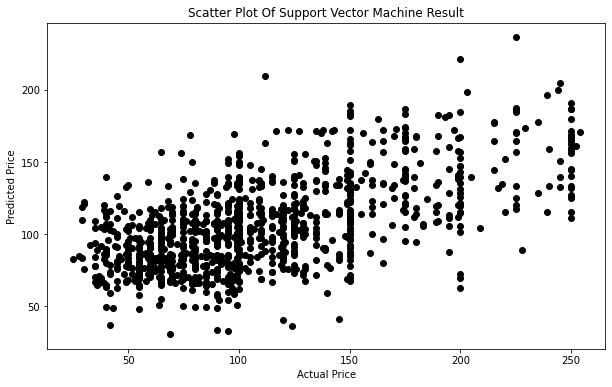

In [20]:
plt.rcParams['figure.figsize'] = [10, 6]

plt.scatter(y_test, y_pred_test, color = 'black')
plt.title('Scatter Plot Of Support Vector Machine Result')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price');

#### XGB Regressor Method

In [21]:
# help - https://thinkingneuron.com/how-to-create-an-xgboost-model-for-regression-in-python/
# help - https://stackoverflow.com/questions/58318685/how-to-hide-warnings-from-xgboost-library-in-jupyter
# we can use the sqrt of mean_squared_error, to get the distance from  line
from xgboost.sklearn import XGBRegressor
model = XGBRegressor('reg:linear',verbosity = 0)
model.fit(X_train, y_train)

# Predicting train and test(same steps as above)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# r2_score
xgb_model_train = r2_score(y_train, y_pred_train)
xgb_model_test = r2_score(y_test, y_pred_test)

print(f"R-squared value for train data: {xgb_model_train}")
print(f"R-squared value for test data: {xgb_model_test}")
print(f"Average Missed Distance From Price: {mean_squared_error(y_test, y_pred_test, squared = False)}")

R-squared value for train data: 0.7822738838469437
R-squared value for test data: 0.4570009405371742
Average Missed Distance From Price: 37.97670746708108


#### XGB Regressor Method Visuals

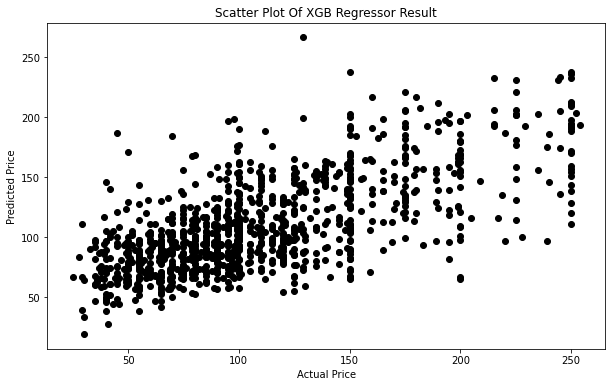

In [22]:
plt.rcParams['figure.figsize'] = [10, 6]

plt.scatter(y_test, y_pred_test, color = 'black')
plt.title('Scatter Plot Of XGB Regressor Result')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price');

#### Bayesian Ridge Method

In [23]:
from sklearn.linear_model import BayesianRidge

model = BayesianRidge()
model.fit(X_train, y_train)

# Predicting train and test(same steps as above)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# r2_score
baye_model_train = r2_score(y_train, y_pred_train)
baye_model_test = r2_score(y_test, y_pred_test)

print(f"R-squared value for train data: {baye_model_train}")
print(f"R-squared value for test data: {baye_model_test}")
print(f"Average Missed Distance From Price: {mean_squared_error(y_test, y_pred_test, squared = False)}")

R-squared value for train data: 0.4265742873361258
R-squared value for test data: 0.3967437735491848
Average Missed Distance From Price: 40.02844112055365


#### Bayesian Ridge Visuals

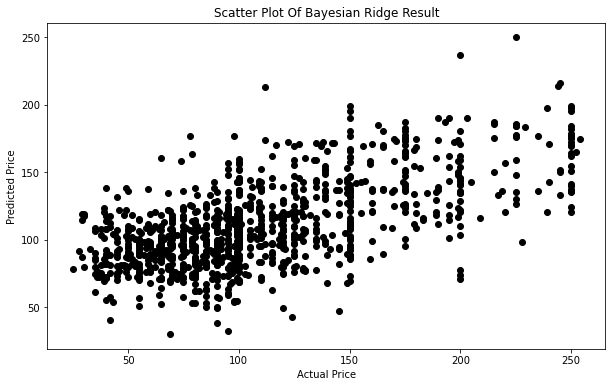

In [24]:
plt.rcParams['figure.figsize'] = [10, 6]

plt.scatter(y_test, y_pred_test, color = 'black')
plt.title('Scatter Plot Of Bayesian Ridge Result')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price');

#### Random Forest Classifier Method

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predicting train and test(same steps as above)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# r2_score
rfc_model_train = r2_score(y_train, y_pred_train)
rfc_model_test = r2_score(y_test, y_pred_test)

print(f"R-squared value for train data: {rfc_model_train}")
print(f"R-squared value for test data: {rfc_model_test}")
print(f"Average Missed Distance From Price: {mean_squared_error(y_test, y_pred_test, squared = False)}")

R-squared value for train data: 0.8798376527180126
R-squared value for test data: 0.16035121943307962
Average Missed Distance From Price: 47.224416591293746


#### Random Forest Classifier Visuals

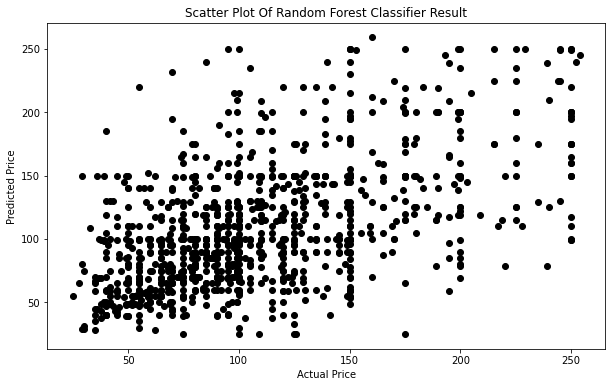

In [26]:
plt.rcParams['figure.figsize'] = [10, 6]

plt.scatter(y_test, y_pred_test, color = 'black')
plt.title('Scatter Plot Of Random Forest Classifier Result')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price');

#### Gradient Boosting Regressor Method

In [27]:
# help - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

from sklearn.ensemble import GradientBoostingRegressor
# we will go with the deafult parameters

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Predicting train and test(same steps as above)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# r2_score
gradient_model_train = r2_score(y_train, y_pred_train)
gradient_model_test = r2_score(y_test, y_pred_test)

print(f"R-squared value for train data: {gradient_model_train}")
print(f"R-squared value for test data: {gradient_model_test}")
print(f"Average Missed Distance From Price: {mean_squared_error(y_test, y_pred_test, squared = False)}")

R-squared value for train data: 0.5426674347024946
R-squared value for test data: 0.47566460944842215
Average Missed Distance From Price: 37.31834338125408


#### Gradient Boosting Regressor Visuals

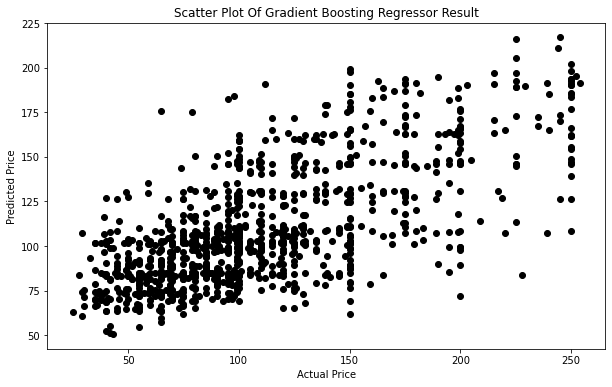

In [28]:
plt.rcParams['figure.figsize'] = [10, 6]

plt.scatter(y_test, y_pred_test, color = 'black')
plt.title('Scatter Plot Of Gradient Boosting Regressor Result')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price');

#### Cat Boost Regressor Method

In [29]:
from catboost import CatBoostRegressor

model = CatBoostRegressor()
model.fit(X_train, y_train)

# Predicting train and test(same steps as above)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# r2_score
cat_model_train = r2_score(y_train, y_pred_train)
cat_model_test = r2_score(y_test, y_pred_test)

Learning rate set to 0.047321
0:	learn: 50.5058642	total: 54.3ms	remaining: 54.2s
1:	learn: 49.6381421	total: 55.7ms	remaining: 27.8s
2:	learn: 48.8384827	total: 56.8ms	remaining: 18.9s
3:	learn: 48.1009007	total: 57.9ms	remaining: 14.4s
4:	learn: 47.3968857	total: 58.9ms	remaining: 11.7s
5:	learn: 46.7251168	total: 60ms	remaining: 9.94s
6:	learn: 46.1580852	total: 61ms	remaining: 8.65s
7:	learn: 45.5826276	total: 61.6ms	remaining: 7.63s
8:	learn: 45.0794893	total: 62.6ms	remaining: 6.89s
9:	learn: 44.5680349	total: 63.4ms	remaining: 6.28s
10:	learn: 44.1039180	total: 64.5ms	remaining: 5.8s
11:	learn: 43.6545201	total: 65.4ms	remaining: 5.38s
12:	learn: 43.2791719	total: 66.4ms	remaining: 5.04s
13:	learn: 42.9242935	total: 67.3ms	remaining: 4.74s
14:	learn: 42.5356967	total: 68.2ms	remaining: 4.48s
15:	learn: 42.1884845	total: 69ms	remaining: 4.24s
16:	learn: 41.8623724	total: 69.8ms	remaining: 4.04s
17:	learn: 41.5787551	total: 70.7ms	remaining: 3.85s
18:	learn: 41.3125579	total: 71.4

320:	learn: 32.9631664	total: 340ms	remaining: 719ms
321:	learn: 32.9569095	total: 341ms	remaining: 718ms
322:	learn: 32.9553808	total: 342ms	remaining: 716ms
323:	learn: 32.9471440	total: 343ms	remaining: 716ms
324:	learn: 32.9456685	total: 344ms	remaining: 715ms
325:	learn: 32.9438871	total: 345ms	remaining: 713ms
326:	learn: 32.9423957	total: 346ms	remaining: 711ms
327:	learn: 32.9411221	total: 346ms	remaining: 710ms
328:	learn: 32.9355246	total: 347ms	remaining: 708ms
329:	learn: 32.9342937	total: 348ms	remaining: 707ms
330:	learn: 32.9290828	total: 349ms	remaining: 705ms
331:	learn: 32.9094656	total: 349ms	remaining: 703ms
332:	learn: 32.9081623	total: 350ms	remaining: 702ms
333:	learn: 32.9068914	total: 351ms	remaining: 700ms
334:	learn: 32.8999483	total: 352ms	remaining: 698ms
335:	learn: 32.8979329	total: 353ms	remaining: 697ms
336:	learn: 32.8740121	total: 353ms	remaining: 695ms
337:	learn: 32.8727817	total: 354ms	remaining: 694ms
338:	learn: 32.8605033	total: 355ms	remaining:

546:	learn: 31.0624968	total: 515ms	remaining: 426ms
547:	learn: 31.0561949	total: 515ms	remaining: 425ms
548:	learn: 31.0494397	total: 517ms	remaining: 425ms
549:	learn: 31.0487215	total: 518ms	remaining: 424ms
550:	learn: 31.0389144	total: 518ms	remaining: 422ms
551:	learn: 31.0307675	total: 519ms	remaining: 421ms
552:	learn: 31.0252868	total: 520ms	remaining: 420ms
553:	learn: 31.0160126	total: 520ms	remaining: 419ms
554:	learn: 31.0102904	total: 521ms	remaining: 418ms
555:	learn: 30.9943429	total: 522ms	remaining: 417ms
556:	learn: 30.9846901	total: 522ms	remaining: 416ms
557:	learn: 30.9839846	total: 523ms	remaining: 414ms
558:	learn: 30.9642004	total: 524ms	remaining: 413ms
559:	learn: 30.9635143	total: 525ms	remaining: 412ms
560:	learn: 30.9594520	total: 526ms	remaining: 411ms
561:	learn: 30.9569165	total: 527ms	remaining: 410ms
562:	learn: 30.9437580	total: 528ms	remaining: 409ms
563:	learn: 30.9368959	total: 528ms	remaining: 408ms
564:	learn: 30.9238391	total: 529ms	remaining:

776:	learn: 29.6736351	total: 691ms	remaining: 198ms
777:	learn: 29.6648839	total: 692ms	remaining: 198ms
778:	learn: 29.6645111	total: 693ms	remaining: 197ms
779:	learn: 29.6585536	total: 694ms	remaining: 196ms
780:	learn: 29.6519661	total: 695ms	remaining: 195ms
781:	learn: 29.6463890	total: 696ms	remaining: 194ms
782:	learn: 29.6440115	total: 696ms	remaining: 193ms
783:	learn: 29.6435707	total: 697ms	remaining: 192ms
784:	learn: 29.6416914	total: 698ms	remaining: 191ms
785:	learn: 29.6345973	total: 700ms	remaining: 190ms
786:	learn: 29.6336766	total: 701ms	remaining: 190ms
787:	learn: 29.6333199	total: 702ms	remaining: 189ms
788:	learn: 29.6291840	total: 703ms	remaining: 188ms
789:	learn: 29.6275285	total: 704ms	remaining: 187ms
790:	learn: 29.6221421	total: 704ms	remaining: 186ms
791:	learn: 29.6176107	total: 705ms	remaining: 185ms
792:	learn: 29.6130017	total: 707ms	remaining: 184ms
793:	learn: 29.6058675	total: 707ms	remaining: 184ms
794:	learn: 29.6033799	total: 708ms	remaining:

986:	learn: 28.6801183	total: 864ms	remaining: 11.4ms
987:	learn: 28.6709358	total: 865ms	remaining: 10.5ms
988:	learn: 28.6641891	total: 866ms	remaining: 9.63ms
989:	learn: 28.6639965	total: 867ms	remaining: 8.76ms
990:	learn: 28.6610188	total: 868ms	remaining: 7.88ms
991:	learn: 28.6565632	total: 869ms	remaining: 7.01ms
992:	learn: 28.6511666	total: 871ms	remaining: 6.14ms
993:	learn: 28.6433570	total: 872ms	remaining: 5.26ms
994:	learn: 28.6396976	total: 873ms	remaining: 4.39ms
995:	learn: 28.6394097	total: 875ms	remaining: 3.51ms
996:	learn: 28.6355459	total: 876ms	remaining: 2.63ms
997:	learn: 28.6353033	total: 879ms	remaining: 1.76ms
998:	learn: 28.6323333	total: 883ms	remaining: 884us
999:	learn: 28.6273099	total: 887ms	remaining: 0us


#### Cat Boost Regressor Visuals

In [30]:
print(f"R-squared value for train data: {cat_model_train}")
print(f"R-squared value for test data: {cat_model_test}")
print(f"Average Missed Distance From Price: {mean_squared_error(y_test, y_pred_test, squared = False)}")

R-squared value for train data: 0.6911675671039983
R-squared value for test data: 0.4924641834108424
Average Missed Distance From Price: 36.71564130927711


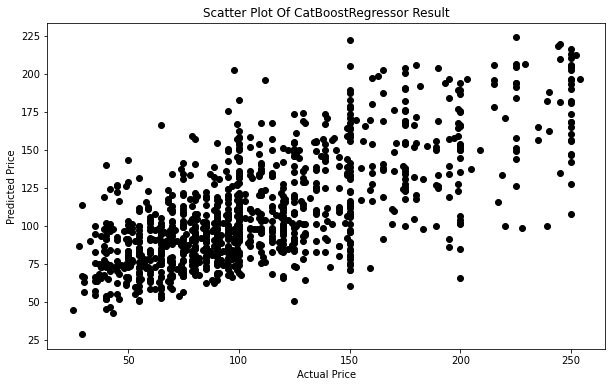

In [31]:
plt.rcParams['figure.figsize'] = [10, 6]

plt.scatter(y_test, y_pred_test, color = 'black')
plt.title('Scatter Plot Of CatBoostRegressor Result')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price');

### Step 4: R-Squared Visualization
> **Now that we have obtained the R-squared scores of both data using different models, I will be comparing each one against each other.**

In [32]:
scores_train = [svr_model_train, xgb_model_train, baye_model_train, 
                rfc_model_train, gradient_model_train, cat_model_train]
scores_test = [svr_model_test, xgb_model_test, baye_model_test, 
                rfc_model_test, gradient_model_test, cat_model_test]
labels = ['Support Vector Machine', 'XGB Regressor', 'Bayesian Ridge',
         'Random Forest Classifier', 'Gradient Boosting Regressor', 'Cat Boost Regressor']

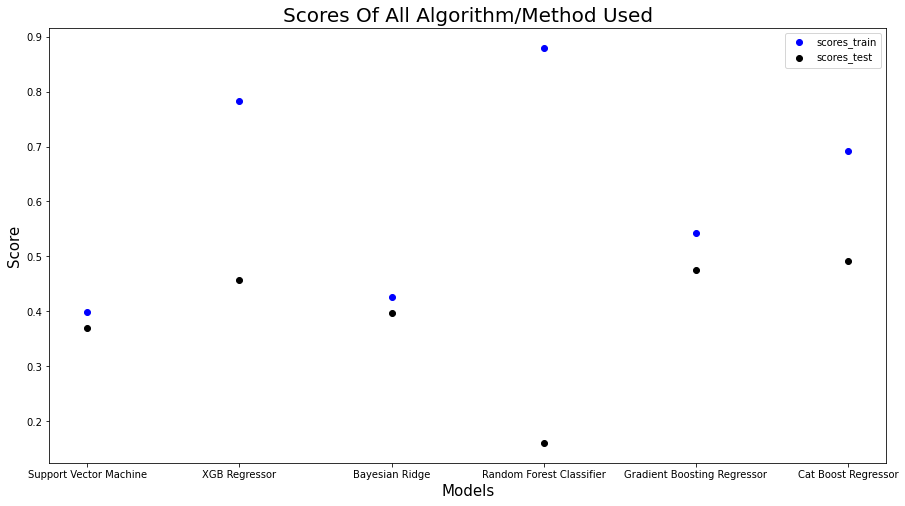

In [34]:
plt.rcParams['figure.figsize'] = [15, 8]

plt.scatter(labels, scores_train, color = 'blue')
plt.scatter(labels, scores_test, color = 'black')
plt.legend(['scores_train', 'scores_test'])
plt.ylabel('Score', fontsize = 15)
plt.xlabel('Models', fontsize = 15)
plt.title('Scores Of All Algorithm/Method Used', fontsize = 20)
plt.savefig('Scores Of All Models Used.png');

**Here, we can see that the Support Method Machine and Bayesian Ridge Models have the smallest gap while the Random Forest Classifier has the widest one. However, our models fail at explaining ‌prices for different independent variables. Therefore, I can conclude that we have not found the best model, but this is a good start.** <br>

**However, looking at the model and if I had to choose 2 models, I would go for Gradient Boosting Regressor(GBR) and Bayesian Ridge, in that order. Firstly, Bayesian Ridge has a similar distance to the Support Vector Machine model, but the r2 scores for the train and test data are higher.**

**In terms of percentage, GBR's r2 scores have a slightly larger distance between them, but both scores are higher than Bayesian Ridge. In other words, I would say that the distance is small enough for me to consider it as a usable model(out of all the ones presented).**